---
title: "2022-12-27"
# subtitle: Last 
# author: <a href="https://github.com/ChoCho66">ChoCho</a>
author: ChoCho
date: last-modified
date-format: iso
institute: Last update date
bibliography: ../references.bib
slide-number: c/t
# knitr: true
# jupyter: python3
# reference-location: margin
format:
  revealjs:
    # theme: beige
    # theme: ../custom.scss
    theme: [serif,custom.scss]    # 像 LaTeX
    width: 1800
    height: 1050
    # transition: fade
    # preview-links: auto
    # slide-number: true
    # slide-tone: true
    # show-slide-number: print
    chalkboard:
      theme: whiteboard
      boardmarker-width: 2
      src: "Chalkboard-2022-12-27.json"
    scrollable: true
    echo: true
    # footer: "NCU math"
    # logo: cover.jpg

---

## Recall 2022-12-20

- Date $(x^{(1)},y^{(1)}), \cdots , (x^{(n)},y^{(n)})$ 是從 $y=f_{\mathtt{real}}(x)$ (不是 loss surface) 加上一些擾動 sample 出來的.

- $f_{\mathtt{real}}$ 一般會是連續函數.
  
  - [Stone–Weierstrass theorem](https://en.wikipedia.org/wiki/Stone–Weierstrass_theorem) (但不好計算 gradient).

- 要估計 $f_{\mathtt{real}}$:
  
  - 去生成 $f$ s.t. $f\approx f_{\mathtt{real}}.$
  
  - 用 $\widehat{y}=\mathtt{Net}(x):=f(x)$ 作為估計值.
  
  - $\mathtt{Net}=\mathtt{Net}(\theta),$ 
    $\theta$ 為變量.
  
  - Linear model 大多時無用.
  
  - Let $\widehat{y}^{(i)}=\mathtt{Net}(x^{(i)}).$
    We minimize $L(\theta)=\frac{1}{n}\sum_{i\in B_t} \ell(y^{(i)},\widehat{y}^{(i)})$ for each $t,$ 
    where $\ell$ is some loss function.
    
    - 需要 $\nabla L.$
  
  - Linear function 很好計算 gradient, 
  但只靠 Linear function 生成的 $\mathtt{Net}$ 無法逼近任意連續函數.


# Multilayer Perceptrons (MLP) (ch5 en)

- Activation functions (5.1.2 en)

- Universal Approximators (5.1.1.4 en)

- Forward Propagation, Backward Propagation (5.3 en)

- API (5.2.2 en)

## Multilayer Perceptrons (MLP) (ch5 en)

- 像在 softmax regression 一樣,
  在 linear 後接一個非 linear function $\sigma.$

- 希望模仿神經學的神經傳導.
  - [https://towardsai.net/p/machine-learning/introduction-to-neural-networks-and-their-key-elements-part-c-activation-functions-layers-ea8c915a9d9](https://towardsai.net/p/machine-learning/introduction-to-neural-networks-and-their-key-elements-part-c-activation-functions-layers-ea8c915a9d9)
  - ![](https://cdn-images-1.medium.com/max/550/1*pO5X2c28F1ysJhwnmPsy3Q.gif)

  - Activation functions (5.1.2 en)

## Activation functions (5.1.2 en)

- Sigmoid Function: $$\mathtt{sigmoid}(x) = \dfrac{1}{1+\exp(-x)}.$$

- Linear model 加上 sigmoid $\approx f_{\mathtt{real}}$?
  - Universal Approximators (5.1.1.4 en)

In [7]:
import torch
from torch import nn
from d2l import torch as d2l

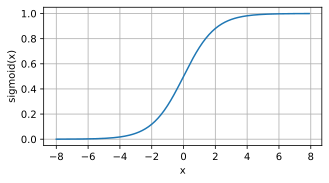

In [8]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5, 2.5))

## Universal Approximators (5.1.1.4 en)
- [https://speech.ee.ntu.edu.tw/~hylee/ml/2022-spring.php](https://speech.ee.ntu.edu.tw/~hylee/ml/2022-spring.php)
  - [https://speech.ee.ntu.edu.tw/~hylee/ml/ml2022-course-data/whydeep%20(v4).pdf](https://speech.ee.ntu.edu.tw/~hylee/ml/ml2022-course-data/whydeep%20(v4).pdf) p4-p6


In [9]:
#| echo: false
from IPython.display import IFrame
IFrame('sigmoid.pdf', width=1400, height=650)

## MLP

:::: {.columns}
::: {.column}

- ![](catanddogDNN.gif)
  - [https://medium.com/\@tiago.tmleite/neural-networks-multilayer-perceptron-and-the-backpropagation-algorithm-a5cd5b904fde](https://medium.com/@tiago.tmleite/neural-networks-multilayer-perceptron-and-the-backpropagation-algorithm-a5cd5b904fde)

- MLP 的 $L(\theta)=\frac{1}{n}\sum_{i\in B_t} \ell(y^{(i)},\widehat{y}^{(i)}),$ 很好去計算 gradient.

  - Forward Propagation, Backward Propagation (5.3 en).


:::

::: {.column}

![](images/2022-12-27/2022-12-27-07-27-29.png){width=50%}

:::
::::

## Forward Propagation, Backward Propagation (5.3 en)

- Goal: 將要計算的 gradient 寫成矩陣運算.

<hr style='height:2px;border-width:0;color:gray;background-color:gray'>

:::: {.columns}
::: {.column}
![](images/2022-12-27/2022-12-27-07-47-19.png)
:::

::: {.column}
![](images/2022-12-27/2022-12-27-07-48-20.png)
:::
::::


## 用 API 弄 NN (5.2.2 en)

In [10]:
import torch
from torch import nn
from d2l import torch as d2l

### `Data`

In [11]:
data = d2l.FashionMNIST(batch_size=256)

### `Model`

In [12]:
class MLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(), 
                                 nn.LazyLinear(num_hiddens),
                                 nn.ReLU(), 
                                 nn.LazyLinear(num_outputs))

model = MLP(num_outputs=10, num_hiddens=256, lr=0.1)

/Users/chocho/Library/r-miniconda-arm64/lib/python3.10/site-packages/torch/nn/modules/lazy.py:178: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


### `Trainer`

In [13]:
trainer = d2l.Trainer(max_epochs=16)

### `fit`

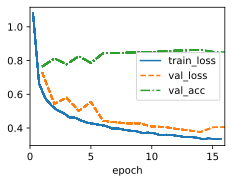

In [14]:
trainer.fit(model,data)

### Visualizing Net

- [https://github.com/ashishpatel26/Tools-to-Design-or-Visualize-Architecture-of-Neural-Network](https://github.com/ashishpatel26/Tools-to-Design-or-Visualize-Architecture-of-Neural-Network)

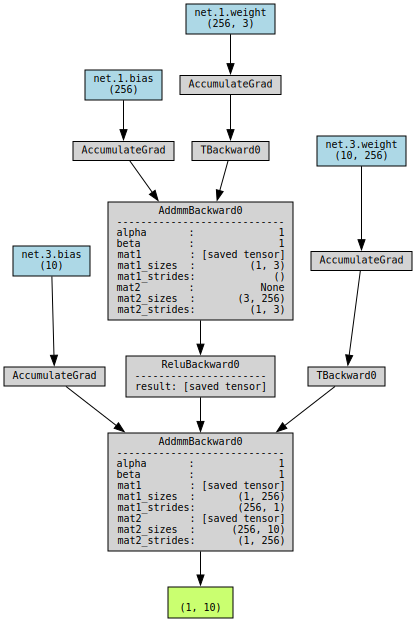

In [15]:
#| output-location: column
from torchviz import make_dot
model1 = MLP(num_outputs=10, 
             num_hiddens=256, 
             lr=0.1)
yhat = model1(torch.tensor([[1.0, 2, 3]]))
make_dot(yhat, 
         params=dict(list(model1.named_parameters())),
         show_attrs=True)

# Numerical Stability and Initialization (5.4 en)

- Vanishing gradient (5.4.1.1 en)
  
- Parameter Initialization (5.4.2 en)
  
  - Breaking the Symmetry (5.4.1.3 en)
  
    - ![](images/2022-12-27/2022-12-26-21-51-30.png){width=50%}
  
  - Xavier Initialization (5.4.2.2 en)
  

## Vanishing gradient (5.4.1.1 en)

:::: {.columns}
::: {.column}

- ReLU Function: $$\mathtt{ReLU}(x) = \max \lbrace x,0 \rbrace.$$

- [https://speech.ee.ntu.edu.tw/~hylee/ml/2022-spring.php](https://speech.ee.ntu.edu.tw/~hylee/ml/2022-spring.php)
  - [https://speech.ee.ntu.edu.tw/~hylee/ml/ml2022-course-data/whydeep%20(v4).pdf](https://speech.ee.ntu.edu.tw/~hylee/ml/ml2022-course-data/whydeep%20(v4).pdf) p7

:::

::: {.column}

![](images/2022-12-27/2022-12-26-23-01-59.png){width=80%}

:::
::::

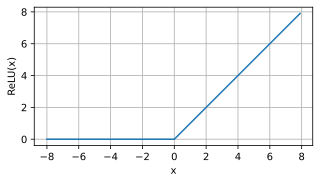

In [ ]:
#| output-location: column
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'ReLU(x)', figsize=(5, 2.5))

## Xavier Initialization (5.4.2.2 en)

:::: {.columns}
::: {.column}

![](images/2022-12-27/2022-12-27-07-52-14.png){width=50%} 

- $W$ 待定.

- Let $X,W$ be two independent random elements,
  where
  
  - $X$: mean $0,$ variance $\gamma_X^2,$ (平移資料可得到. 這裡不能假設 $\gamma_X=1,$ 因為還要考慮反向 Net.)

  - $\bigl\lbrace W_{i,j} \bigr\rbrace_{i,j}:$ iid with mean $0,$ variance $\sigma^2.$

- $H=\mathtt{Net}(X)=XW.$
  
  - $\color{blue}{\text{Goal 1}}$: $\mathtt{Var}(H_j)$ small for each $j.$

:::

::: {.column}

- $\mathbf E[H_j]=\sum_{i=1}^{n_{\mathtt{in}}}\mathbf E[W_{i,j}X_i]=0.$

- \quad
$$
\begin{aligned}
  \mathtt{Var}(H_j)
  &=\mathbf E[H_j^2]-\mathbf E[H_j]^2=\sum_{i=1}^{n_{\mathtt{in}}}\mathbf E[W_{i,j}^2 X_i^2] \cr 
    &=n_{\mathtt{in}}\sigma^2 \gamma_X^2.
\end{aligned}
$$

- So we want $n_{\mathtt{in}}\sigma^2\gamma_X^2$ small.

- Conversely, given $H,$ we have $X=\widetilde{\mathtt{Net}}(H).$
  
  - $\color{blue}{\text{Goal 2}}$: $\mathtt{Var}(X_j)$ small for each $j.$

- We want $n_{\mathtt{out}}\sigma^2\gamma_H^2$ small.

- We choose $\sigma^2$ s.t. 
  $\bigl( \frac{n_{\mathtt{in}}+n_{\mathtt{out}}}{2} \bigr)\sigma^2 = 1.$


In [5]:
w = torch.empty(3, 5)
print(w)
print(nn.init.xavier_uniform_(w))

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
tensor([[-0.7297,  0.1423, -0.6871, -0.6520,  0.1607],
        [ 0.7169, -0.4961, -0.8605, -0.5396,  0.8132],
        [-0.7804, -0.2611, -0.2891,  0.7202, -0.4338]])



:::
::::


## Overfitting (3.6.2 en)


:::: {.columns}
::: {.column}

- MLP 只要參數足夠多, 一定能逼近 $f_{\mathtt{real}}.$
  
  - 幾乎都會造成 overfitting.

  - 不必要的曲折太多.

- ![](https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F5308433%2Faabe419f488880ac8e74143d589daada%2Fmlconcepts_image5-rnehsa.png?generation=1606574545155377&alt=media)
  
  - [https://www.kaggle.com/general/200076](https://www.kaggle.com/general/200076)

:::

::: {.column}

### 解決方式:
  
- K-Fold Cross-Validation

  - ![](images/2022-12-27/2022-12-27-07-09-21.png)
    - [https://ithelp.ithome.com.tw/articles/10279240](https://ithelp.ithome.com.tw/articles/10279240)

- Dropout (5.6 en)
  - 跟 K-Fold Cross-Validation 一樣是取平均概念.

- Regularization (3.7 en, 4.4.4 zh)
  - 限制優化的範圍.

:::
::::


## Dropout (5.6 en)

- Overfitting 的原因來自 $\mathtt{Net}(x)$ 太過曲折.
  - 太多 activation functions 都起作用.

- 解決方式: 在訓練時, 每代入任意 $x,$ 
  每個 hidden layers 都用 $p$ 機率丟掉.
  - ![](https://d2l.ai/_images/dropout2.svg)

- For each hidden layer $h,$
  we use the new hidden layer $h'$ by
  $$
  \begin{aligned}
    h' = \frac{1}{1-p} 1_{D_h} h,
  \end{aligned}
  $$
  where $\lbrace D_h\rbrace_h$ are independent with $\mathbf{P}[D_h]=1-p.$

  - $\mathbf E[h'] = h.$


## Dropout = average

:::: {.columns}
::: {.column}

![](images/2022-12-27/2022-12-27-09-09-31.png)

  - [https://speech.ee.ntu.edu.tw/~tlkagk/courses/ML_2017/Lecture/DNN%20tip.pdf](https://speech.ee.ntu.edu.tw/~tlkagk/courses/ML_2017/Lecture/DNN%20tip.pdf) p47.

:::

::: {.column}

![](images/2022-12-27/2022-12-27-09-14-21.png)

:::
::::


## Code for dropout (5.6.2, 5.6.3 en)

In [6]:
class DropoutMLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens_1, num_hiddens_2,
                 dropout_1, dropout_2, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.Flatten(), 
            nn.LazyLinear(num_hiddens_1), 
            nn.ReLU(),
            nn.Dropout(dropout_1), 
            nn.LazyLinear(num_hiddens_2), 
            nn.ReLU(),
            nn.Dropout(dropout_2), 
            nn.LazyLinear(num_outputs))

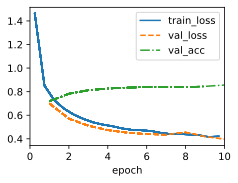

In [9]:
#| output-location: column
hparams = {'num_outputs':10, 'num_hiddens_1':256, 'num_hiddens_2':256,
           'dropout_1':0.5, 'dropout_2':0.5, 'lr':0.1}
model = DropoutMLP(**hparams)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

# Regularization 

- Weight decay (3.7 en, 4.4.4 zh).

- $\ell_1$ regularization vs $\ell_2$ regularization.

## Regularization (Weight decay) (3.7 en, 4.4.4 zh)

- ![](images/2022-12-27/2022-12-27-09-24-21.png){width=80%}

- $\arg \min_{\theta} L(\theta) \qquad \implies \qquad \arg \min_{\theta} \bigl( L(\theta) + \lambda \left\lVert \theta \right\rVert \bigr)$ for some given $\lambda>0,$
where $\left\lVert \cdot \right\rVert$ is some norm.

  - 限制優化的範圍.

  - 某方面等價於: $\qquad\arg \min_{\theta} L(\theta)$ subject to $\lVert \theta\rVert\leq t$ for some $t>0.$
  
    - [https://stats.stackexchange.com/a/348505](https://stats.stackexchange.com/a/348505)

    - KKT Conditions
    
      - [https://bobondemon.github.io/2017/11/14/Notes-for-KKT-Conditions/](https://bobondemon.github.io/2017/11/14/Notes-for-KKT-Conditions/)


## 限制優化的範圍 (We see $\ell_2$ case)

:::: {.columns}
::: {.column}

- $f=f(\theta)$: 待優化函數.

- Let $\theta_2^* = \arg \min_{\theta} f(\theta)$ subject to $\lVert \theta\rVert\leq t$ for some $t>0.$

- 不考慮這種情形
  
  - ![](images/2022-12-27/2022-12-27-09-30-02.png){width=70%}


:::

::: {.column}

:::
::::

## 限制優化的範圍 (We see $\ell_2$ case)

:::: {.columns}
::: {.column}

- $f=f(\theta)$: 待優化函數.

- Let $\theta_2^* = \arg \min_{\theta} f(\theta)$ subject to $\lVert \theta\rVert\leq t$ for some $t>0.$

- 考慮
  - ![](images/2022-12-27/2022-12-27-09-36-41.png){width=70%}

:::

::: {.column}

- Then
  - $\lVert \theta_2^* \rVert=t,$ and
  - there exists some $\lambda>0$ s.t.
    $$
    \begin{aligned}
      \nabla f(\theta_2^*) + \lambda \cdot \nabla \lVert \cdot \rVert \Big\vert_{\theta_2^*} = 0.
    \end{aligned}
    $$

- This implies that 
  $$
  \begin{aligned}
    \theta_2^* = \arg\min_\theta \big( f(\theta) + \lambda \lVert \theta \rVert \big) := \theta_1^*.
  \end{aligned}
  $$

- Note that $\lvert \nabla f(\theta_2^*) \rvert \nearrow$ 
  and $\left\lvert \nabla \lVert \cdot \rVert \Big\vert_{\theta_2^*} \right\rvert \searrow$ if $t\searrow 0.$
  So
  $$
  \begin{aligned}
    \lambda = \frac{\lvert \nabla f(\theta_2^*) \rvert}{\left\lvert \nabla \lVert \cdot \rVert \Big\vert_{\theta_2^*} \right\rvert} \nearrow
  \end{aligned}
  $$
  if $t\searrow 0.$

- In some sense, $\lambda \searrow \iff t \nearrow.$

:::
::::


## $\ell_1$ regularization vs $\ell_2$ regularization

:::: {.columns}
::: {.column}

- ridge regression ($\ell_2$): $\left\lVert \theta \right\rVert = \big\lVert (\theta_1,\cdots,\theta_n) \big\rVert_2^2= \sum_{i=1}^n \left\lvert \theta_i \right\rvert^2 .$

- lasso regression ($\ell_1$): $\left\lVert \theta \right\rVert = \big\lVert (\theta_1,\cdots,\theta_n) \big\rVert_1=\sum_{i=1}^n \bigl\lvert \theta_i \bigr\rvert.$

- ![](images/2022-12-27/2023-01-02-12-02-02.png)

:::

::: {.column}

- [https://www.zhihu.com/question/26485586](https://www.zhihu.com/question/26485586)
  
  - ![](https://pic1.zhimg.com/v2-ea5454fc80e6c601fdb347caeeba28cc_r.jpg?source=1940ef5c)

  - ![](https://pic1.zhimg.com/v2-d88e01e730c8e8d91facbd2b1248bfec_r.jpg?source=1940ef5c)

- [https://vimsky.com/article/3852.html](https://vimsky.com/article/3852.html)

:::
::::



- ![](https://i1.wp.com/www.alexejgossmann.com/images/penalty_function_contours/p-norm_balls.gif?zoom=2&w=578&ssl=1)

  - [https://www.r-bloggers.com/2017/03/contours-of-statistical-penalty-functions-as-gif-images-2/](https://www.r-bloggers.com/2017/03/contours-of-statistical-penalty-functions-as-gif-images-2/)

- $\ell_1$: Concentrate weights on a small set of features by clearing the other weights to zero.
  
  - An effective method for feature selection.

- $\ell_2$: Distribute weight evenly across a larger number of features.
